#### Summary

This project is about predicting the flight ticket price. There are number of factors which influence the flight ticket price.
The general factors influencing the price are:- 

1. No. of airlines (competitors) in the market.
2. The duration of travel
3. The day of travel (whether a weekday or weekend or holiday)
4. The time of travel (whether during normal timings or odd time)
5. The no. of stops (whether a connecting flight or direct flight)
6. The category of seat (whether a first class or business class or economy class)

Here we are given a dataset which has information about flight and its travel details. Both training and test data are provided. We are required to analyse the factors influencing the price and build a model to predict it.

We will be using regression algorithms as the data is not categorical. 

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df=pd.read_excel("Flight ticket training data.xlsx", parse_dates=['Date_of_Journey'])
dftest=pd.read_excel("Flight ticket testing data.xlsx", parse_dates=['Date_of_Journey'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
dftest.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways      2019-06-06     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      2019-12-05   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      2019-06-24  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [5]:
#checking shape of the datasets
print(df.shape)
print(dftest.shape)

(10683, 11)
(2671, 10)


In [6]:
#checking the datatypes of the dataset
print(df.dtypes)
print("")
print(dftest.dtypes)

#all the columns except price are of object datatypes.

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


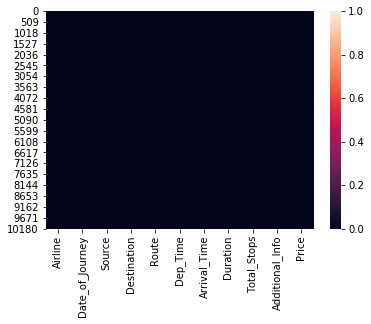

In [7]:
#checking for missing values in the training dataset
print(df.isnull().sum())
sns.heatmap(df.isnull())

#There is one missing value in the route and one missing value in the Total_Stops

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


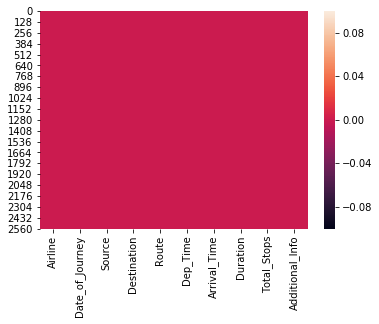

In [8]:
#missing values in the test dataset
print(dftest.isnull().sum())
sns.heatmap(dftest.isnull())

#There are no missing values in the test dataset

#### Univariate Analysis

In [9]:
#checking the unique values in the training dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    282
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    16

1) Airline has 12 unique flight carrier names.


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet 

2) Source Cities has five unique values:-
    Delhi, Kolkata, Bangalore, Mumbai and Chennai
    
3) Destination has six cities mentioned:-
    Cochin, Bangalore, Delhi, New Delhi, Hyderabad and Kolkata
    Since Delhi and New Delhi are same cities. We can merge them into one.
    
4) Route- 128 different routes are mentioned

5) Dep_Time
    222 different dep time are mentioned
  
6) Arrival Time 
    1343 unique values are present. The time is followed by data in some columns
    
7) Duration time
    It has 368 unique values

8) Total Stops has five unique values
Non stop, 1 stop, 2 stops, 3 stops and 4 stops

9) Additional Info
It has unique values like:-
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight

10) Price has 1870 unique values

In [10]:
#checking the unique values in the testing dataset
for i in dftest.columns:
    print(dftest[i].value_counts())
    print("\n")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


2019-09-05    144
2019-12-06    135
2019-05-18    129
2019-06-06    127
2019-06-03    125
2019-09-06    119
2019-05-21    118
2019-05-15    106
2019-06-15    105
2019-03-21     93
2019-03-06     92
2019-03-03     88
2019-01-06     88
2019-06-24     85
2019-03-24     78
2019-01-04     78
2019-09-03     76
2019-06-27     75
2019-06-05     73
2019-05-24     71
2019-12-05     68
2019-03-27     65
2019-05-27     65
2019-01-05     62
2019-01-03     46
2019-12-03     43
2019-03-18     41
2019-03-15     33
2019-03-04     

1) Airline has 11 unique flight carrier names.


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2


2) Source Cities has five unique values:-
    Delhi, Kolkata, Bangalore, Mumbai and Chennai
    
3) Destination has six cities mentioned:-
    Cochin, Bangalore, Delhi, New Delhi, Hyderabad and Kolkata
    Since Delhi and New Delhi are same cities. We can merge them into one.
    
4) Route-100 different routes are mentioned

5) Dep_Time
    199 different dep time are mentioned
  
6) Arrival Time 
    704 unique values are present. The time is followed by data in some columns
    
7) Duration time
    It has 320 unique values

8) Total Stops has five unique values
Non stop, 1 stop, 2 stops, 3 stops and 4 stops

9) Additional Info

It has unique values like:-
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1



In [11]:
#Replacing the value 'New Delhi' in the datasets with 'Delhi' as both are the same cities

df['Destination']=df['Destination'].replace('New Delhi', 'Delhi')
dftest['Destination']=dftest['Destination'].replace('New Delhi', 'Delhi')

In [12]:
#Checking the unique values of the destination column in both the dataset to see if New Delhi is replaced by Delhi
print(df['Destination'].value_counts())
print("\n")
print(dftest['Destination'].value_counts())

# New Delhi has been replaced with Delhi successfully

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [13]:
#Deriving month, year and day from the date column for the training dataset
df['month']=df['Date_of_Journey'].dt.month_name()
df['year']=df['Date_of_Journey'].dt.year
df['day']=df['Date_of_Journey'].dt.day_name()
df["Date_Of_Journey"] = df['Date_of_Journey'].dt.day
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore       Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore       Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

       month  year       day  Date_Of_Journey  
0      March  2019    Sunday               24  
1    January  2019  Saturday                5  
2  September  2019    Friday                6  
3   December  2019  Thursday                5  
4    January  2019  Thursday                3

In [14]:
#making one more column which will tell whether it is a weekday or weekend
df['type_of_day']=np.where((df['day']=='Sunday')|(df['day']=='Saturday'), "weekend", "weekday")
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore       Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore       Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

       month  year       day  Date_Of_Journey type_of_day  
0      March  2019    Sunday               24     weekend  
1    January  2019  Saturday                5     weekend  
2  September  2019    Friday                6     weekday  
3   December  2019  Thursday                5     weekday  
4    January  2019  Thursday                3     weekday

In [15]:
#Deriving month, year and day from the date column for the testing dataset
dftest['month']=dftest['Date_of_Journey'].dt.month_name()
dftest['year']=dftest['Date_of_Journey'].dt.year
dftest['day']=dftest['Date_of_Journey'].dt.day_name()
dftest["Date_Of_Journey"] = dftest['Date_of_Journey'].dt.day

dftest.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways      2019-06-06     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      2019-12-05   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      2019-06-24  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info   
1    06:20         10:20       4h      1 stop                      No info   
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included   
3    08:00         21:00      13h      1 stop                      No info   
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info   

      month  year       day  Date_Of_Journey  
0      June  2019  Thursday                6  
1  December  2019  Thursday                5  
2       May  2019   Tuesday               21  
3       May  2019   Tuesday               21  
4      June  2019    Monday               24

In [16]:
#making one more column which will tell whether it is a weekday or weekend for the testing dataset
dftest['type_of_day']=np.where((dftest['day']=='Sunday')|(dftest['day']=='Saturday'), "weekend", "weekday")
dftest.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways      2019-06-06     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      2019-12-05   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      2019-05-21     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      2019-06-24  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info   
1    06:20         10:20       4h      1 stop                      No info   
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included   
3    08:00         21:00      13h      1 stop                      No info   
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info   

      month  year       day  Date_Of_Journey type_of_day  
0      June  2019  Thursday                6     weekday  
1  December  2019  Thursday                5     weekday  
2       May  2019   Tuesday               21     weekday  
3       May  2019   Tuesday               21     weekday  
4      June  2019    Monday               24     weekday

In [17]:
#checking the unique values of new columns derived from date to check whether to retain the column or not
#training dataset
print(df['month'].value_counts())
print("")
print(df['year'].value_counts())
print("")
print(df['day'].value_counts())
print()
print(df['type_of_day'].value_counts())

June         2536
March        2211
May          2074
September    1406
January      1075
December      957
April         424
Name: month, dtype: int64

2019    10683
Name: year, dtype: int64

Thursday     2290
Friday       1802
Wednesday    1599
Monday       1491
Tuesday      1236
Saturday     1203
Sunday       1062
Name: day, dtype: int64

weekday    8418
weekend    2265
Name: type_of_day, dtype: int64


In [18]:
#checking the unique values of new columns derived from date to check whether to retain the column or not
#testing dataset
print(dftest['month'].value_counts())
print("")
print(dftest['year'].value_counts())
print("")
print(dftest['day'].value_counts())
print()
print(dftest['type_of_day'].value_counts())

June         650
March        545
May          489
September    363
January      274
December     257
April         93
Name: month, dtype: int64

2019    2671
Name: year, dtype: int64

Thursday     565
Friday       460
Wednesday    392
Monday       367
Saturday     311
Tuesday      300
Sunday       276
Name: day, dtype: int64

weekday    2084
weekend     587
Name: type_of_day, dtype: int64


In [19]:
#In both the datasets, we can observe that 2019 is common for all rows and hence it can be deleted
#Similarly since the day and month is derived, we can drop the date of journey column

df1=df.drop(['year','Date_of_Journey'],axis=1)
dftest1=dftest.drop(['year','Date_of_Journey'],axis=1)

In [20]:
dftest1.head()

Airline    Source Destination            Route Dep_Time  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK    17:30   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR    06:20   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK    19:15   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK    08:00   
4           Air Asia  Banglore       Delhi        BLR → DEL    23:55   

   Arrival_Time Duration Total_Stops              Additional_Info     month  \
0  04:25 07 Jun  10h 55m      1 stop                      No info      June   
1         10:20       4h      1 stop                      No info  December   
2  19:00 22 May  23h 45m      1 stop  In-flight meal not included       May   
3         21:00      13h      1 stop                      No info       May   
4  02:45 25 Jun   2h 50m    non-stop                      No info      June   

        day  Date_Of_Journey type_of_day  
0  Thursday                6     weekday  
1  Thursday                5     weekday  
2   Tuesday               21     weekday  
3   Tuesday               21     weekday  
4    Monday               24     weekday

In [21]:

# cleaning duration column in train dataset
duration = list(df1["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []

for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
    
df1["Duration_minutes"] = dur_minutes
df1.drop(["Duration"], axis=1, inplace = True)

In [22]:

# cleaning duration column in the test dataset
duration = list(dftest1["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
dftest1["Duration_minutes"] = dur_minutes
dftest1.drop(labels = 'Duration', axis = 1, inplace = True)

In [23]:

#Cleaning Departure and Arrival Times
# Training Set
df1['Depart_Time_Hour'] = pd.to_datetime(df1.Dep_Time).dt.hour
df1['Depart_Time_Minutes'] = pd.to_datetime(df1.Dep_Time).dt.minute
df1.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df1['Arr_Time_Hour'] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1['Arr_Time_Minutes'] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

# Test Set
dftest1['Depart_Time_Hour'] = pd.to_datetime(dftest1.Dep_Time).dt.hour
dftest1['Depart_Time_Minutes'] = pd.to_datetime(dftest1.Dep_Time).dt.minute
dftest1.drop(labels = 'Dep_Time', axis = 1, inplace = True)
dftest1['Arr_Time_Hour'] = pd.to_datetime(dftest1.Arrival_Time).dt.hour
dftest1['Arr_Time_Minutes'] = pd.to_datetime(dftest1.Arrival_Time).dt.minute
dftest1.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [24]:
#Combining departure time minutes with hour in training dataset
#training dataset
df1['Depart_Time_Minutes_Final']=df1['Depart_Time_Minutes']/60 #converting minutes into hour
df1['Depart_Time_Hour_Final']=round(df1['Depart_Time_Hour']+df1['Depart_Time_Minutes_Final'],2)
df1['Depart_Time_Hour_Final']

0        22.33
1         5.83
2         9.42
3        18.08
4        16.83
5         9.00
6        18.92
7         8.00
8         8.92
9        11.42
10        9.75
11       20.33
12       11.67
13       21.17
14       17.25
15       16.67
16        8.75
17       14.00
18       20.25
19       16.00
20       14.17
21       22.00
22        4.00
23       18.92
24       18.92
25       21.42
26       21.83
27        7.00
28        9.75
29        7.08
30        7.08
31        9.83
32        4.00
33       14.58
34        7.08
35       10.58
36       15.08
37       14.25
38        7.00
39        7.08
40        7.08
41        6.75
42       20.92
43       11.17
44        9.00
45        5.75
46        4.00
47       11.67
48       19.00
49       23.08
50       11.00
51        9.58
52       22.33
53       21.25
54       23.92
55       19.75
56        8.83
57        7.08
58       19.00
59       15.67
60        9.42
61        6.08
62        8.75
63       15.00
64        7.08
65       10.58
66        

In [25]:
#Combining departure time minutes with hour in test dataset
#test dataset

dftest1['Depart_Time_Minutes_Final']=dftest1['Depart_Time_Minutes']/60 #converting minutes into hour
dftest1['Depart_Time_Hour_Final']=round(dftest1['Depart_Time_Hour']+dftest1['Depart_Time_Minutes_Final'],2)
dftest1['Depart_Time_Hour_Final']

0       17.50
1        6.33
2       19.25
3        8.00
4       23.92
5       18.25
6        7.50
7       15.25
8       10.17
9       16.50
10      13.92
11       6.83
12       9.00
13       5.75
14      19.25
15      21.42
16      13.25
17       9.92
18      19.25
19      22.92
20      10.75
21      20.00
22      21.42
23       5.50
24      21.08
25      16.00
26      15.25
27      17.50
28       9.00
29      14.00
30      22.83
31      13.92
32       5.50
33      19.83
34       7.17
35       5.92
36       7.17
37      16.92
38      18.92
39      10.33
40      17.17
41      13.00
42      22.75
43       8.00
44      21.00
45      17.75
46      19.25
47      13.92
48      18.92
49       7.50
50       9.42
51      14.08
52      13.92
53       5.75
54       9.75
55      15.25
56       2.00
57      11.67
58       6.83
59      17.00
60       6.00
61       7.08
62       2.00
63      16.75
64      19.67
65      13.00
66       2.00
67       3.83
68      21.25
69      11.50
70      12.00
71    

In [26]:
# We need to do the same with the arrival time. Combine the arrival time hour and minutes
# For training data
df1['Arr_Time_Minutes_Final']=df1['Arr_Time_Minutes']/60 #converting minutes into hour
df1['Arr_Time_Hour_Final']=round(df1['Arr_Time_Hour']+df1['Arr_Time_Minutes_Final'],2)
df1['Arr_Time_Hour_Final']

0         1.17
1        13.25
2         4.42
3        23.50
4        21.58
5        11.42
6        10.42
7         5.08
8        10.42
9        19.25
10       23.00
11       22.92
12       13.92
13        9.33
14       19.83
15       19.25
16       13.25
17       12.58
18       19.25
19       12.58
20       19.33
21       13.33
22        6.83
23       21.83
24        8.25
25       12.58
26        3.58
27       12.92
28       12.58
29        9.33
30        9.33
31       23.25
32        6.83
33       12.58
34       12.58
35       21.00
36       20.33
37       16.75
38       13.25
39       19.00
40       18.17
41       15.25
42       19.00
43       13.92
44       21.00
45        8.58
46        6.83
47       13.92
48       11.08
49       19.00
50       14.25
51       10.92
52        1.17
53        0.25
54        2.75
55       12.00
56       23.92
57        9.33
58        1.50
59       16.75
60       21.83
61        9.42
62       19.00
63        1.50
64        9.33
65       21.00
66       1

In [27]:
# We need to do the same with the arrival time. Combine the arrival time hour and minutes
# For test data
dftest1['Arr_Time_Minutes_Final']=dftest1['Arr_Time_Minutes']/60 #converting minutes into hour
dftest1['Arr_Time_Hour_Final']=round(dftest1['Arr_Time_Hour']+dftest1['Arr_Time_Minutes_Final'],2)
dftest1['Arr_Time_Hour_Final']

0        4.42
1       10.33
2       19.00
3       21.00
4        2.75
5       12.58
6       22.58
7       20.50
8       12.92
9       22.58
10      18.83
11      16.17
12      19.25
13      10.42
14      12.58
15       8.25
16      22.50
17      22.17
18       4.42
19       8.25
20       1.58
21      10.08
22       9.00
23      19.00
24      23.92
25       4.42
26      17.75
27      19.00
28       4.42
29      21.00
30       1.33
31       1.58
32      12.58
33      22.83
34       8.58
35       8.58
36       8.58
37      23.00
38      12.00
39      21.00
40      19.67
41       1.50
42       0.25
43       7.67
44       2.25
45      20.08
46      18.83
47      15.42
48      22.58
49      21.00
50      13.75
51      19.83
52      16.33
53      11.42
54      12.00
55      18.17
56       7.75
57      19.17
58      12.17
59      18.83
60      19.25
61       9.42
62       7.75
63      22.42
64      22.33
65      15.83
66       7.42
67      12.58
68       0.25
69      18.83
70      13.50
71    

In [28]:
# After arriving at the final departure time and final arrival time, we can now remove the columns which are unnecessary
df2=df1.drop(['Arr_Time_Minutes_Final', 'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes' , 'Depart_Time_Minutes_Final'], axis=1)
dftest2=dftest1.drop(['Arr_Time_Minutes_Final', 'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes' , 'Depart_Time_Minutes_Final'], axis=1)

In [29]:
#checking the training dataset after removing above columns
df2.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore       Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price      month       day  Date_Of_Journey type_of_day  \
0         No info   3897      March    Sunday               24     weekend   
1         No info   7662    January  Saturday                5     weekend   
2         No info  13882  September    Friday                6     weekday   
3         No info   6218   December  Thursday                5     weekday   
4         No info  13302    January  Thursday                3     weekday   

   Duration_minutes  Depart_Time_Hour_Final  Arr_Time_Hour_Final  
0               170                   22.33                 1.17  
1               445                    5.83                13.25  
2              1140                    9.42                 4.42  
3               325                   18.08                23.50  
4               285                   16.83                21.58

In [30]:
#checking the test dataset after removing above columns
dftest2.head()

Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info     month       day  Date_Of_Journey  \
0                      No info      June  Thursday                6   
1                      No info  December  Thursday                5   
2  In-flight meal not included       May   Tuesday               21   
3                      No info       May   Tuesday               21   
4                      No info      June    Monday               24   

  type_of_day  Duration_minutes  Depart_Time_Hour_Final  Arr_Time_Hour_Final  
0     weekday               655                   17.50                 4.42  
1     weekday               240                    6.33                10.33  
2     weekday              1425                   19.25                19.00  
3     weekday               780                    8.00                21.00  
4     weekday               170                   23.92                 2.75

#### Handling missing data
There are two missing data in training dataset and no missing data in the test dataset as investigated before

In [31]:
#Checking the row where data is missing
df2[df2.isnull().any(axis=1)]

#The two values missing pertains to one row where flight has left from Delhi to Cochin. So to fill the missing values, we will analyse the flights(Air India) which has left for same route and similar flight price

Airline Source Destination Route Total_Stops Additional_Info  Price  \
9039  Air India  Delhi      Cochin   NaN         NaN         No info   7480   

     month        day  Date_Of_Journey type_of_day  Duration_minutes  \
9039  June  Wednesday                5     weekday              1420   

      Depart_Time_Hour_Final  Arr_Time_Hour_Final  
9039                    9.75                 9.42

In [32]:
delhicochin=df2.loc[(df2['Source']=='Delhi') & (df2['Destination']=='Cochin')]
delhicochin

Airline Source Destination  \
2                            Jet Airways  Delhi      Cochin   
9                      Multiple carriers  Delhi      Cochin   
10                             Air India  Delhi      Cochin   
15                             Air India  Delhi      Cochin   
16                              SpiceJet  Delhi      Cochin   
17                           Jet Airways  Delhi      Cochin   
18                             Air India  Delhi      Cochin   
19                           Jet Airways  Delhi      Cochin   
20                                 GoAir  Delhi      Cochin   
25                           Jet Airways  Delhi      Cochin   
26                                IndiGo  Delhi      Cochin   
27                                 GoAir  Delhi      Cochin   
33                           Jet Airways  Delhi      Cochin   
34                           Jet Airways  Delhi      Cochin   
35                                IndiGo  Delhi      Cochin   
39                           Jet Airways  Delhi      Cochin   
40                     Multiple carriers  Delhi      Cochin   
42                           Jet Airways  Delhi      Cochin   
44                     Multiple carriers  Delhi      Cochin   
49                           Jet Airways  Delhi      Cochin   
50                           Jet Airways  Delhi      Cochin   
58                     Multiple carriers  Delhi      Cochin   
61                             Air India  Delhi      Cochin   
62                     Multiple carriers  Delhi      Cochin   
63                                IndiGo  Delhi      Cochin   
65                                IndiGo  Delhi      Cochin   
68                             Air India  Delhi      Cochin   
72                     Multiple carriers  Delhi      Cochin   
73                           Jet Airways  Delhi      Cochin   
74                                IndiGo  Delhi      Cochin   
78                           Jet Airways  Delhi      Cochin   
83                                IndiGo  Delhi      Cochin   
84                     Multiple carriers  Delhi      Cochin   
86                                IndiGo  Delhi      Cochin   
87                           Jet Airways  Delhi      Cochin   
90                     Multiple carriers  Delhi      Cochin   
91                     Multiple carriers  Delhi      Cochin   
93                             Air India  Delhi      Cochin   
99                           Jet Airways  Delhi      Cochin   
102                          Jet Airways  Delhi      Cochin   
105                          Jet Airways  Delhi      Cochin   
106                    Multiple carriers  Delhi      Cochin   
107                    Multiple carriers  Delhi      Cochin   
108                            Air India  Delhi      Cochin   
109                          Jet Airways  Delhi      Cochin   
113                          Jet Airways  Delhi      Cochin   
114                                GoAir  Delhi      Cochin   
115                    Multiple carriers  Delhi      Cochin   
116                            Air India  Delhi      Cochin   
117                    Multiple carriers  Delhi      Cochin   
119                          Jet Airways  Delhi      Cochin   
123                            Air India  Delhi      Cochin   
131                          Jet Airways  Delhi      Cochin   
132                              Vistara  Delhi      Cochin   
134                    Multiple carriers  Delhi      Cochin   
135                          Jet Airways  Delhi      Cochin   
136                          Jet Airways  Delhi      Cochin   
137                            Air India  Delhi      Cochin   
139                          Jet Airways  Delhi      Cochin   
140                    Multiple carriers  Delhi      Cochin   
142                               IndiGo  Delhi      Cochin   
143                               IndiGo  Delhi      Cochin   
144                    Multiple carriers  Delhi      Cochin   
1

#By analysis the above dataset, for the price around 7000, the route the flight (Airline - Air India) has taken from Delhi to Cochin is DEL → TRV → COK and total no. of stop is one. 

We can replace the same in the null values appearing in the dataset


In [33]:
df2['Route']=df2['Route'].replace(np.nan, 'DEL → TRV → COK')
df2['Total_Stops']=df2['Total_Stops'].replace(np.nan, '1 stop')

In [34]:
#Checking if there are null values if any
df2.isnull().sum()

#null values are been replaced 

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Price                     0
month                     0
day                       0
Date_Of_Journey           0
type_of_day               0
Duration_minutes          0
Depart_Time_Hour_Final    0
Arr_Time_Hour_Final       0
dtype: int64

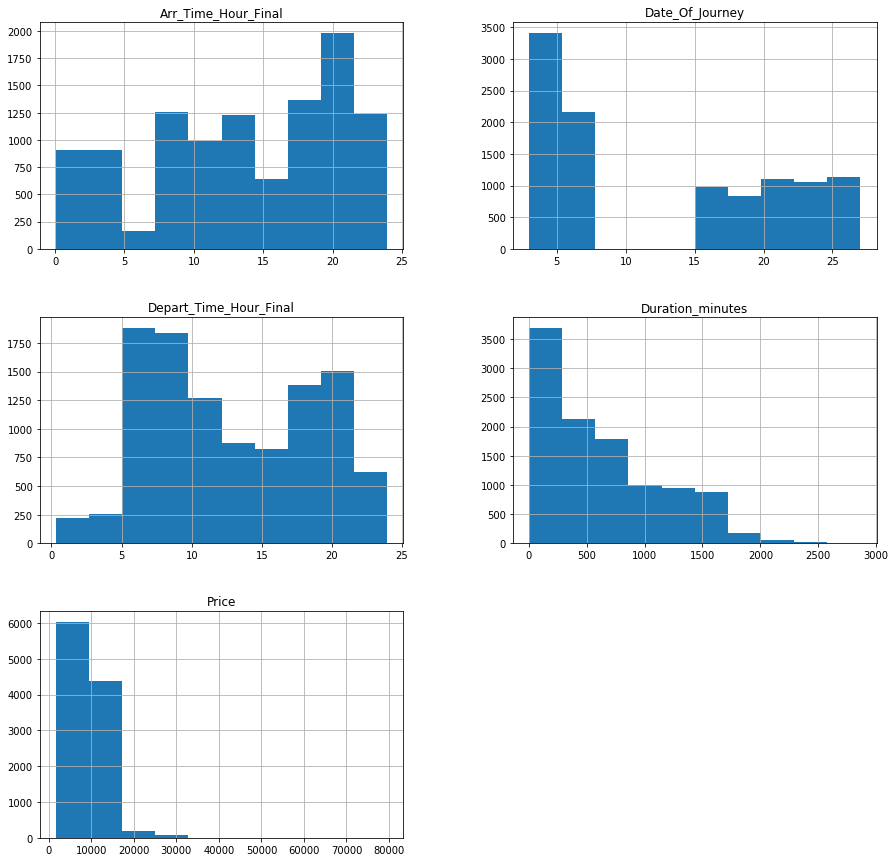

In [35]:
#checking the distribution of the data
#training data
df2.hist(figsize=(15,15))
plt.show()

Observations
1) Most of the arrival time is around 08.00-09.00 at night.
2) Most of the departure time is between 05.00 am and 10.00 am at the morning.
3) Mostly the duration of the flights is within 250 mins. 
4) Most of the prices are within 10000, followed by 10000-20000. The no. of flight prices over 20000 is rare.

#### Distribution of the data

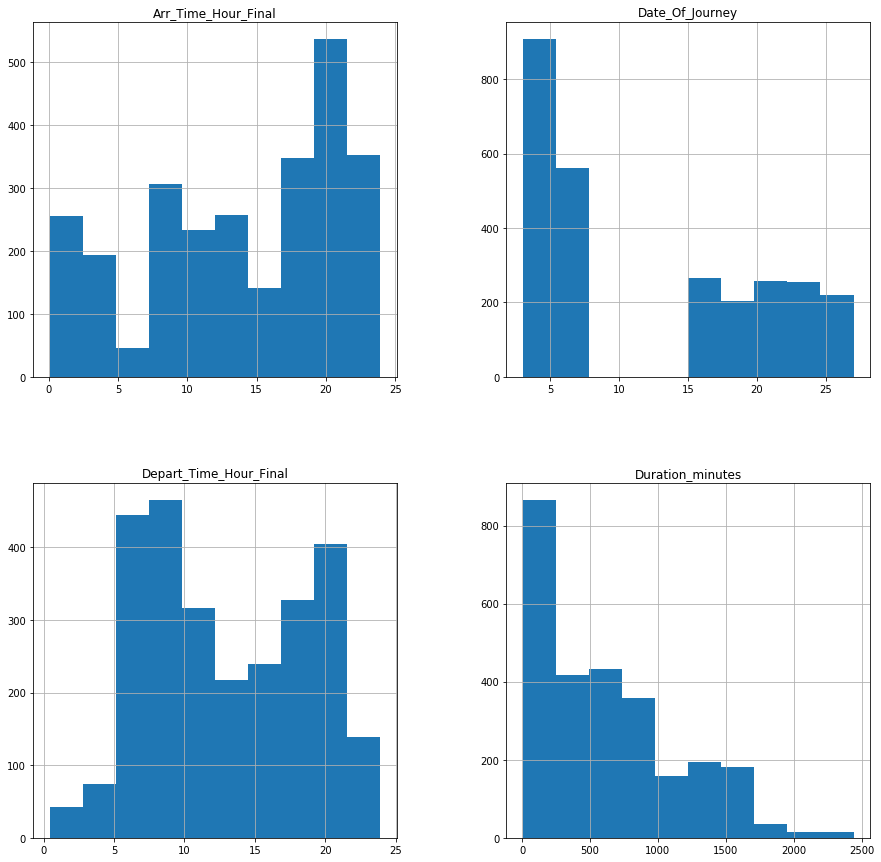

In [36]:
#checking the distribution of the data
#test data
dftest2.hist(figsize=(15,15))
plt.show()

In [37]:
#The test data observations on the distribution is same as that of the training data

#### Outliers in the data

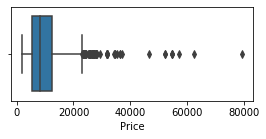

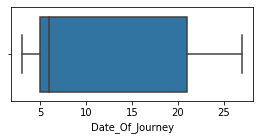

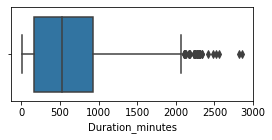

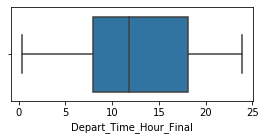

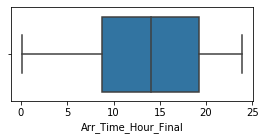

In [38]:
#checking the outliers of the data
#training data
for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

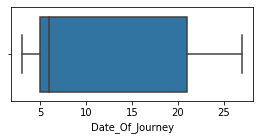

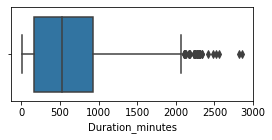

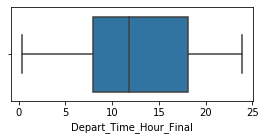

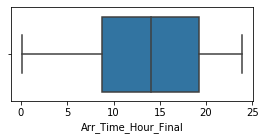

In [39]:
#checking the outliers of the data
#test data
for i in dftest2.columns:
    if dftest2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

Observations:
1. There are outliers in the price and duration minutes column in the training dataset
2. There are outliers in the duration minutes column in the test dataset

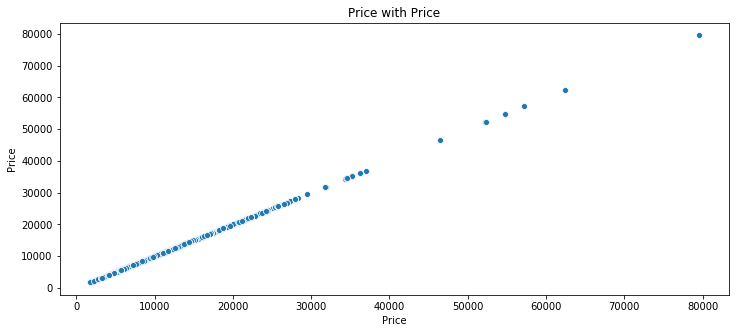

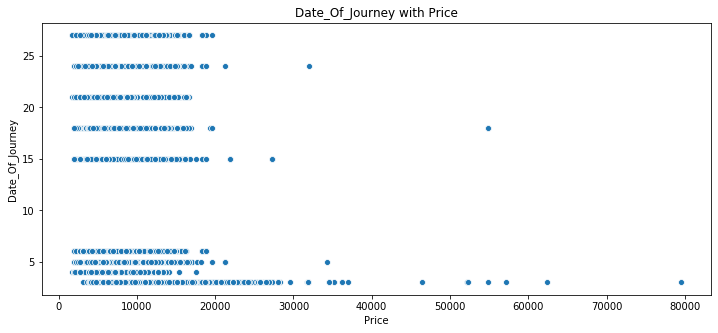

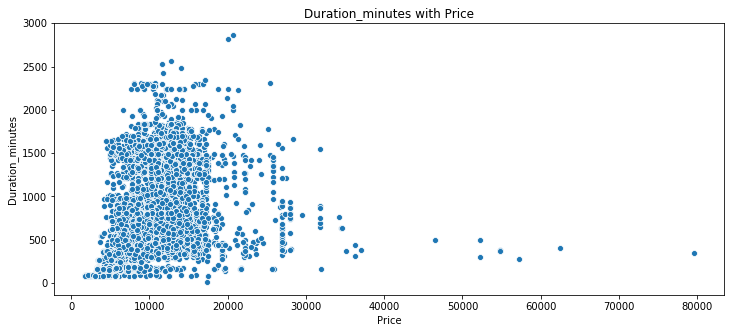

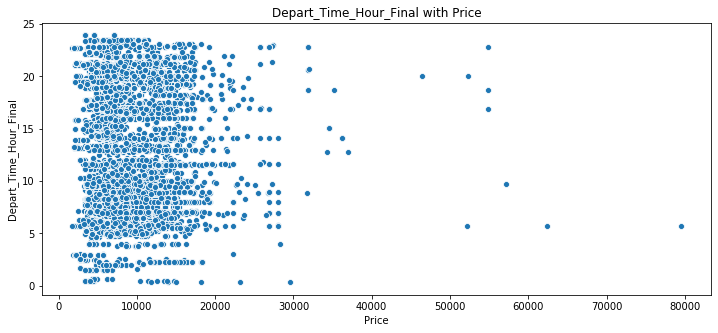

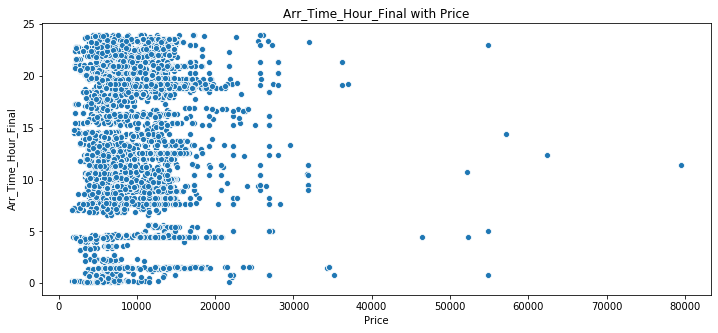

In [40]:
#scatter plots. checking the attributes relationship with the target 'Price'. Since only training data has price column, 
#we will use only training data here.

for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Price')
        sns.scatterplot(x=df2['Price'], y=df2[i], data=df2)
        plt.show()

Observations
1. The numerical variables doesnot show positive relationship with the price.


#### Analysing by grouping the data and its effect with price
###### Here since only training dataset has price column, we are not considering test data for analysis

In [41]:
df2.groupby('Airline').mean()

Price  Date_Of_Journey  \
Airline                                                            
Air Asia                            5590.260188        13.141066   
Air India                           9611.210616        11.937785   
GoAir                               5861.056701        12.835052   
IndiGo                              5673.682903        12.921578   
Jet Airways                        11643.923357        12.349961   
Jet Airways Business               58358.666667         3.000000   
Multiple carriers                  10902.678094        13.888796   
Multiple carriers Premium economy  11418.846154        21.000000   
SpiceJet                            4338.284841        13.623472   
Trujet                              4140.000000         3.000000   
Vistara                             7796.348643        12.035491   
Vistara Premium economy             8962.333333         3.333333   

                                   Duration_minutes  Depart_Time_Hour_Final  \
Airline                                                                       
Air Asia                                 348.275862               14.686270   
Air India                                943.253425               12.696610   
GoAir                                    298.969072               12.383711   
IndiGo                                   285.406722               12.612655   
Jet Airways                              849.733697               13.781008   
Jet Airways Business                     386.666667               11.193333   
Multiple carriers                        625.769231               10.373043   
Multiple carriers Premium economy        606.538462                8.135385   
SpiceJet                                 178.484108               12.790134   
Trujet                                   195.000000               13.080000   
Vistara                                  598.413361               13.419916   
Vistara Premium economy                  153.333333               11.526667   

                                   Arr_Time_Hour_Final  
Airline                                                 
Air Asia                                     12.516834  
Air India                                    15.173076  
GoAir                                        14.890928  
IndiGo                                       12.774705  
Jet Airways                                  13.489065  
Jet Airways Business                          9.641667  
Multiple carriers                            14.942784  
Multiple carriers Premium economy            16.396154  
SpiceJet                                     11.626980  
Trujet                                       16.330000  
Vistara                                      16.026973  
Vistara Premium economy                      14.080000

Observations:
1. The least price is offered by Truejet and Spicejet around 4100 and 4300 under economy zone.
2. The highest price is amongst Jet Airways Business around 58000.
3. Premium economy prices is higher than economy prices.

In [42]:
df2.groupby('Source').mean()

Price  Date_Of_Journey  Duration_minutes  \
Source                                                      
Banglore   8017.464269        11.653619        376.329085   
Chennai    4789.892388        13.241470        139.619423   
Delhi     10539.439057        13.829623        817.985453   
Kolkata    9158.389411        11.690003        747.248346   
Mumbai     5059.708752        12.236729        191.714491   

          Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Source                                                 
Banglore               12.856900            13.480382  
Chennai                12.562362            13.188478  
Delhi                  12.071393            13.638455  
Kolkata                14.359742            14.432999  
Mumbai                 12.565725            12.975222

In [43]:
pd.crosstab(df2['Source'],df2['Destination'])

Destination  Banglore  Cochin  Delhi  Hyderabad  Kolkata
Source                                                  
Banglore            0       0   2197          0        0
Chennai             0       0      0          0      381
Delhi               0    4537      0          0        0
Kolkata          2871       0      0          0        0
Mumbai              0       0      0        697        0

In [44]:
df2.groupby('Destination').mean()

Price  Date_Of_Journey  Duration_minutes  \
Destination                                                    
Banglore      9158.389411        11.690003        747.248346   
Cochin       10539.439057        13.829623        817.985453   
Delhi         8017.464269        11.653619        376.329085   
Hyderabad     5059.708752        12.236729        191.714491   
Kolkata       4789.892388        13.241470        139.619423   

             Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Destination                                               
Banglore                  14.359742            14.432999  
Cochin                    12.071393            13.638455  
Delhi                     12.856900            13.480382  
Hyderabad                 12.565725            12.975222  
Kolkata                   12.562362            13.188478

Observations:
1. The average price from Delhi to Cochin is the highest at 10539, followed by Kolkata to Bangalore at 9158.
3. The average price from Bangalore to Delhi is 8017.
3. The average price from Mumbai to Hyderabad is 5059 
4. The average price from Chennai to Kolkata is least at 4789.



In [45]:
df2.groupby('Total_Stops').mean()

Price  Date_Of_Journey  Duration_minutes  \
Total_Stops                                                    
1 stop       10593.570032        12.298080        782.053857   
2 stops      12715.807895        12.978947       1233.539474   
3 stops      13112.000000        10.933333       1547.444444   
4 stops      17686.000000         3.000000       1770.000000   
non-stop      5024.900315        13.197365        150.084503   

             Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Total_Stops                                               
1 stop                    12.803765            14.435020  
2 stops                   12.424645            12.948342  
3 stops                    8.741778            16.400222  
4 stops                    5.830000            11.330000  
non-stop                  13.310587            12.992698

Observation
1. The average price of non-stop is least at 5024 and it increases with more no. of stops and highest being at 17686 for 4 stops.

In [46]:
df2.groupby('Additional_Info').mean()

Price  Date_Of_Journey  Duration_minutes  \
Additional_Info                                                                 
1 Long layover                22109.631579         4.105263        919.473684   
1 Short layover               26743.000000         3.000000        875.000000   
2 Long layover                26480.000000         3.000000       1600.000000   
Business class                56811.250000         3.000000        352.500000   
Change airports               16800.714286         3.000000        960.714286   
In-flight meal not included    9471.834511        13.264884        847.093845   
No Info                        8044.666667         3.000000        280.000000   
No check-in baggage included   3645.156250        14.868750        147.531250   
No info                        9141.320192        12.499221        612.933493   
Red-eye flight                10873.000000         3.000000        165.000000   

                              Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Additional_Info                                                            
1 Long layover                             13.570000            13.737368  
1 Short layover                             8.830000            23.420000  
2 Long layover                              6.750000             9.420000  
Business class                              6.770000            12.647500  
Change airports                            10.414286            19.571429  
In-flight meal not included                13.590686            13.492336  
No Info                                    12.806667            17.470000  
No check-in baggage included               12.673969            10.331812  
No info                                    12.745149            13.950358  
Red-eye flight                             23.420000             2.170000

Observations
1. Where no check in baggage in included the avg ticket price is low.
2. The avg price of business class is highest at 56800.
3. One long layover has lesser price when compared to price of one short layover. Two long layover price is higher than price of one long layover

In [47]:
df2.groupby('month').mean()

Price  Date_Of_Journey  Duration_minutes  \
month                                                        
April       5230.860849        21.247642        226.415094   
December    9110.774295         5.152560        686.060606   
January    10492.642791         4.708837        664.911628   
June        9214.964905        13.069795        640.798502   
March       8433.839891        15.277702        601.610131   
May         9361.077628        20.618129        702.519286   
September   9551.474395         4.833570        704.534139   

           Depart_Time_Hour_Final  Arr_Time_Hour_Final  
month                                                   
April                   13.014316            13.844033  
December                13.399425            13.915340  
January                 13.112633            13.946837  
June                    12.788383            13.658446  
March                   12.349068            13.735066  
May                     13.170400            13.874021  
September               13.014203            13.541451

Observation
1. The average price is less in the month of April and highest in the month of January.

In [48]:
df2.groupby('day').mean()

Price  Date_Of_Journey  Duration_minutes  \
day                                                         
Friday     8556.502220        10.288013        659.750277   
Monday     9721.101945        16.452046        627.337357   
Saturday   8894.375727        14.891937        668.420615   
Sunday     9556.827684        11.742938        599.312618   
Thursday   9805.088646        11.792140        694.665939   
Tuesday    8960.452265        11.738673        602.673948   
Wednesday  7996.290807        12.830519        606.419637   

           Depart_Time_Hour_Final  Arr_Time_Hour_Final  
day                                                     
Friday                  13.200660            13.954212  
Monday                  12.653199            13.650973  
Saturday                12.945860            13.751854  
Sunday                  12.546996            13.653719  
Thursday                12.862891            13.834323  
Tuesday                 13.156667            13.524239  
Wednesday               12.830494            13.796354

Observation
1. The average price is highest on thursday and monday.

In [49]:
df2.groupby('type_of_day').mean()

Price  Date_Of_Journey  Duration_minutes  \
type_of_day                                                   
weekday      9055.336303        12.484913         644.99703   
weekend      9204.982340        13.415453         636.01766   

             Depart_Time_Hour_Final  Arr_Time_Hour_Final  
type_of_day                                               
weekday                   12.935036            13.774771  
weekend                   12.758843            13.705841

Observation
1. The average price is weekends is higher than the average price in weekdays

#### Conclusion
1. The average price of weekends is higher than weekdays. However, thursday and monday has more avg price than others.
2. The average price is low when no baggage is allowed.
3. Economy class prices is lesser than premium economy class and business class prices are highest.
4. The average price of non stop flight is lowest. And four stop flight is highest. 
5. Truejet and spicejet offer low prices compared to other airlines.
6. Delhi to Cochin route price is highest and Chennai to Kolkata price is lowest.

#### Checking correlation

In [50]:
#test data
df2.corr()

Price  Date_Of_Journey  Duration_minutes  \
Price                   1.000000        -0.165412          0.506371   
Date_Of_Journey        -0.165412         1.000000         -0.038480   
Duration_minutes        0.506371        -0.038480          1.000000   
Depart_Time_Hour_Final  0.005485        -0.003148          0.000980   
Arr_Time_Hour_Final     0.020939        -0.002998          0.048932   

                        Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Price                                 0.005485             0.020939  
Date_Of_Journey                      -0.003148            -0.002998  
Duration_minutes                      0.000980             0.048932  
Depart_Time_Hour_Final                1.000000             0.010284  
Arr_Time_Hour_Final                   0.010284             1.000000

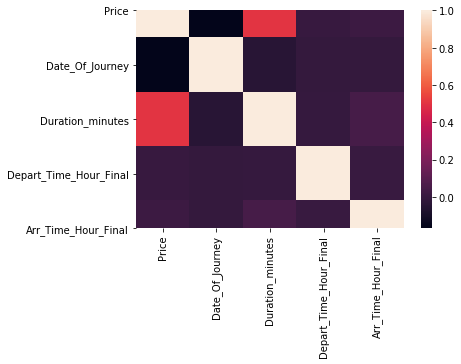

In [51]:
sns.heatmap(df2.corr())

In [52]:
#Only duration in minutes and price show little positive correlation in the training dataset

In [53]:
#Checking correlation in the testing dataset
dftest2.corr()

Date_Of_Journey  Duration_minutes  \
Date_Of_Journey                1.000000         -0.058858   
Duration_minutes              -0.058858          1.000000   
Depart_Time_Hour_Final        -0.024335         -0.019190   
Arr_Time_Hour_Final            0.015094          0.045570   

                        Depart_Time_Hour_Final  Arr_Time_Hour_Final  
Date_Of_Journey                      -0.024335             0.015094  
Duration_minutes                     -0.019190             0.045570  
Depart_Time_Hour_Final                1.000000             0.005361  
Arr_Time_Hour_Final                   0.005361             1.000000

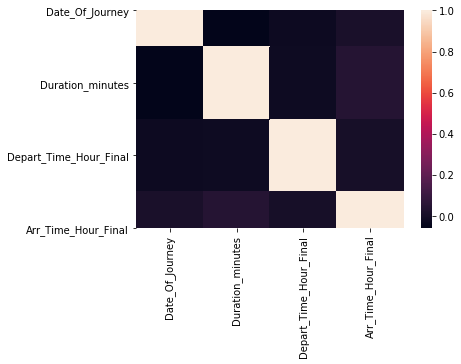

In [54]:
sns.heatmap(dftest2.corr())

In [55]:
#In test data, there is no positive correlation with any factors.

#### Statistical Analysis

In [56]:

df2.describe()

Price  Date_Of_Journey  Duration_minutes  \
count  10683.000000     10683.000000      10683.000000   
mean    9087.064121        12.682205        643.093232   
std     4611.359167         8.803701        507.862001   
min     1759.000000         3.000000          5.000000   
25%     5277.000000         5.000000        170.000000   
50%     8372.000000         6.000000        520.000000   
75%    12373.000000        21.000000        930.000000   
max    79512.000000        27.000000       2860.000000   

       Depart_Time_Hour_Final  Arr_Time_Hour_Final  
count            10683.000000         10683.000000  
mean                12.897679            13.760156  
std                  5.749411             6.821699  
min                  0.330000             0.080000  
25%                  8.000000             8.750000  
50%                 11.830000            14.080000  
75%                 18.080000            19.250000  
max                 23.920000            23.920000

In [57]:
dftest2.describe()

Date_Of_Journey  Duration_minutes  Depart_Time_Hour_Final  \
count      2671.000000        2671.00000             2671.000000   
mean         12.026956         639.74167               13.018555   
std           8.564408         502.18693                5.684564   
min           3.000000           5.00000                0.420000   
25%           5.000000         175.00000                8.000000   
50%           6.000000         520.00000               12.000000   
75%          21.000000         915.00000               18.250000   
max          27.000000        2440.00000               23.920000   

       Arr_Time_Hour_Final  
count          2671.000000  
mean             13.994350  
std               7.007461  
min               0.080000  
25%               8.750000  
50%              15.420000  
75%              19.750000  
max              23.920000

Observations
1. There seems outliers in the price and duration minutes in the training dataset.
2. There seems outliers in the duration minutes in the test dataset.

These needs to be checked later.

#### Encoding the data


In [58]:
#training data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df2.columns:
    if df2.columns.dtype=='O':
        df2[i]=lb.fit_transform(df2[i])

In [59]:
#test data
for i in dftest2.columns:
    if dftest2.columns.dtype=='O':
        dftest2[i]=lb.fit_transform(dftest2[i])

In [60]:
df2.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  Price  \
0        3       0            2     18            4                8     65   
1        1       3            0     84            1                8    669   
2        4       2            1    118            1                8   1537   
3        3       3            0     91            0                8    389   
4        3       0            2     29            0                8   1457   

   month  day  Date_Of_Journey  type_of_day  Duration_minutes  \
0      4    3                7            1                13   
1      2    2                2            1                65   
2      6    0                3            0               202   
3      1    4                2            0                41   
4      2    4                0            0                33   

   Depart_Time_Hour_Final  Arr_Time_Hour_Final  
0                     211                   12  
1                      31                  104  
2                      70                   30  
3                     164                  217  
4                     149                  194

In [61]:
dftest2.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  month  \
0        4       2            1     76            0                5      3   
1        3       3            0     65            0                5      1   
2        4       2            1     76            0                3      5   
3        6       2            1     76            0                5      5   
4        0       0            2     16            4                5      3   

   day  Date_Of_Journey  type_of_day  Duration_minutes  \
0    4                3            0               103   
1    4                2            0                21   
2    5                6            0               236   
3    5                6            0               128   
4    1                7            0                13   

   Depart_Time_Hour_Final  Arr_Time_Hour_Final  
0                     138                   25  
1                      31                   67  
2                     156                  154  
3                      48                  172  
4                     198                   17

#### removing the outliers

In [62]:
#training dataset

from scipy.stats import zscore
z=np.abs(zscore(df2))
print("The shape of dataset before removing the outliers is", df2.shape)
df3=df2[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", df3.shape)

The shape of dataset before removing the outliers is (10683, 14)
The shape of dataset after removing the outliers is (10658, 14)


In [63]:
#test dataset


from scipy.stats import zscore
z=np.abs(zscore(dftest2))
print("The shape of dataset before removing the outliers is", dftest2.shape)
dftest3=dftest2[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", dftest3.shape)

The shape of dataset before removing the outliers is (2671, 13)
The shape of dataset after removing the outliers is (2668, 13)


#### Splitting the train and test data

In [64]:
#training dataset
x=df3.drop(['Price'],axis=1)
y=pd.DataFrame(df3['Price'])
x.head()

Airline  Source  Destination  Route  Total_Stops  Additional_Info  month  \
0        3       0            2     18            4                8      4   
1        1       3            0     84            1                8      2   
2        4       2            1    118            1                8      6   
3        3       3            0     91            0                8      1   
4        3       0            2     29            0                8      2   

   day  Date_Of_Journey  type_of_day  Duration_minutes  \
0    3                7            1                13   
1    2                2            1                65   
2    0                3            0               202   
3    4                2            0                41   
4    4                0            0                33   

   Depart_Time_Hour_Final  Arr_Time_Hour_Final  
0                     211                   12  
1                      31                  104  
2                      70                   30  
3                     164                  217  
4                     149                  194

In [65]:
y.head()

Price
0     65
1    669
2   1537
3    389
4   1457

In [66]:
#No need to split the test dataset set as all the data will be input and output we need to predict them

#### checking the skewness

In [67]:
#training dataset
x.skew()

Airline                   0.730983
Source                   -0.428406
Destination               0.851868
Route                    -0.505241
Total_Stops               0.628056
Additional_Info          -1.544976
month                    -0.345579
day                      -0.062408
Date_Of_Journey           0.135819
type_of_day               1.405682
Duration_minutes          0.783639
Depart_Time_Hour_Final    0.194788
Arr_Time_Hour_Final      -0.105426
dtype: float64

In [68]:
#Using sqrt function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [69]:
#checking skewness again
x.skew()

#skewness has reduced to some extent

Airline                  -0.474038
Source                   -0.428406
Destination              -0.370043
Route                    -0.505241
Total_Stops               0.393976
Additional_Info          -1.544976
month                    -0.345579
day                      -0.062408
Date_Of_Journey           0.135819
type_of_day               1.405682
Duration_minutes          0.203290
Depart_Time_Hour_Final    0.194788
Arr_Time_Hour_Final      -0.105426
dtype: float64

In [70]:
# checking skewness in test dataset
dftest3.skew()

Airline                   0.483962
Source                   -0.427200
Destination               0.797207
Route                    -0.283180
Total_Stops               0.671072
Additional_Info          -1.659418
month                    -0.290465
day                      -0.044640
Date_Of_Journey           0.205147
type_of_day               1.352508
Duration_minutes          0.738916
Depart_Time_Hour_Final    0.177321
Arr_Time_Hour_Final      -0.213146
dtype: float64

In [71]:
#Using sqrt function to remove the skewness 
for i in dftest3.columns:
    if dftest3.skew()[i]>0.55:
        dftest3[i]=np.sqrt(dftest3[i])

In [72]:
# rechecking skewness in test dataset
dftest3.skew()

#skewness has reduced to some extent

Airline                   0.483962
Source                   -0.427200
Destination              -0.406058
Route                    -0.283180
Total_Stops               0.434245
Additional_Info          -1.659418
month                    -0.290465
day                      -0.044640
Date_Of_Journey           0.205147
type_of_day               1.352508
Duration_minutes          0.168522
Depart_Time_Hour_Final    0.177321
Arr_Time_Hour_Final      -0.213146
dtype: float64

#### Scaling the data
We need to scale the data to normalise all input variables.

In [73]:
#Scaling training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

0         1         2         3         4        5         6  \
0 -0.229179 -1.665390  0.853418 -1.555023  1.324797  0.50565  0.249581   
1 -1.350061  0.888038 -1.487764  0.246485  0.217425  0.50565 -0.982485   
2  0.181093  0.036895  0.167702  1.174534  0.217425  0.50565  1.481646   
3 -0.229179  0.888038 -1.487764  0.437554 -0.889947  0.50565 -1.598518   
4 -0.229179 -1.665390  0.853418 -1.254772 -0.889947  0.50565 -0.982485   

          7         8         9        10        11        12  
0  0.002466  1.248292  1.924972 -1.054817  1.686432 -1.557053  
1 -0.484299 -0.736831  1.924972 -0.166685 -1.260704 -0.164637  
2 -1.457830 -0.339807 -0.519488  1.058969 -0.622158 -1.284624  
3  0.489232 -0.736831 -0.519488 -0.497317  0.916902  1.545613  
4  0.489232 -1.530881 -0.519488 -0.628555  0.671307  1.197509

In [74]:
#Scaling test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dftest3=pd.DataFrame(scaler.fit_transform(dftest3))
dftest3.head()

0         1         2         3         4         5         6  \
0  0.011592  0.030734  0.169534  0.796904 -0.872668  0.481288 -0.358054   
1 -0.424003  0.876084 -1.504519  0.391004 -0.872668  0.481288 -1.592275   
2  0.011592  0.030734  0.169534  0.796904 -0.872668 -2.182772  0.876167   
3  0.882782  0.030734  0.169534  0.796904 -0.872668  0.481288  0.876167   
4 -1.730789 -1.659965  0.862950 -1.417095  1.351849  0.481288 -0.358054   

          7         8         9        10        11        12  
0  0.503849 -0.267352 -0.531108  0.313521  0.763462 -1.327337  
1  0.503849 -0.673325 -0.531108 -0.857466 -1.195887 -0.654314  
2  0.991787  0.950567 -0.531108  1.410265  1.093072  0.739805  
3  0.991787  0.950567 -0.531108  0.558563 -0.884588  1.028244  
4 -0.959965  1.356540 -0.531108 -1.063003  1.862163 -1.455532

#### selecting the best random state 
Now we will use the train data and bifurcate it into the training set and testing set to fit into the models and select a best one. The testing data(dftest3) will be used for prediction at the end after finailsing the model. Hence, we will now work only on training data set.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state
        

In [76]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.5639722542363643 is achieved at r_state 75


75

In [77]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=75,test_size=0.20)

In [77]:
#using GridSearchCV to select best parameter for the models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [79]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [80]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.5639722542363643

The cross validation score is 0.5276776413987478

The mean absolute error is  302.39753043436485

The root mean square error is 17.389581088524384


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

The r2 score is  0.733739783241689

The cross validation score is 0.7249434076735295

The mean absolute error is  202.74732645403375

The root mean square error is 14.238936984692142


DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_sta

In [81]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

Model   R2score  Cross_val_score  Mean Squared Error  \
0       LinearRegression  0.563972         0.527678          302.397530   
1    KNeighborsRegressor  0.733740         0.724943          202.747326   
2  DecisionTreeRegressor  0.893175         0.890581           87.104128   
3                    SVR  0.665364         0.641010          245.001247   

   Root Mean Squared Error  
0                17.389581  
1                14.238937  
2                 9.332959  
3                15.652516

In [82]:
#Let us try to improve the models using boosters and regularisation algorithms

### Lasso

In [83]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 1}

In [84]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

The maximum r2 score 0.563790835377648 is achieved at r_state 75


75

In [85]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.5276262711350868


### Ridge

In [86]:
#2. Ridge
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [87]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.5639691743624526 is achieved at r_state 75


75

In [88]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.5276778081599633


### Ensemble Techniques

### RandomForest

In [79]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [90]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [91]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.944319765120705 is achieved at r_state 97


97

In [92]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.9338017921775302


### GradientBoostingRegressor

In [93]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [94]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=1)
max_r2_score(gb,x,y)

The maximum r2 score 0.9346960631441181 is achieved at r_state 57


57

In [95]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.9279360056390571


#### AdaBoostRegressor

In [96]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [97]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=50,learning_rate=0.1)
max_r2_score(ad,x,y)

The maximum r2 score 0.7220017742694425 is achieved at r_state 97


97

In [98]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.7048076148902762


In [99]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.563,0.563,0.944,0.935,0.722],'Cross_val_score':[0.527,0.527,0.934,0.928,0.704]})
result2

Boosters  R2 Score  Cross_val_score
0                   Lasso     0.563            0.527
1                   Ridge     0.563            0.527
2   RandomForestRegressor     0.944            0.934
3  GradientBoostRegressor     0.935            0.928
4       AdaBoostRegressor     0.722            0.704

In [126]:
result

Model   R2score  Cross_val_score  Mean Squared Error  \
0       LinearRegression  0.556518         0.525252          306.313912   
1    KNeighborsRegressor  0.717133         0.707894          210.698218   
2  DecisionTreeRegressor  0.893224         0.892192           85.810585   
3                    SVR  0.646724         0.629802          252.094993   

   Root Mean Squared Error  
0                17.501826  
1                14.515448  
2                 9.263400  
3                15.877500

In [80]:
#by comparing the above results, we can conclude that Random Forest regressor is providing best scores. 
#So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=97,test_size=0.20)
rf=RandomForestRegressor(n_estimators=500)
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The r2 score is", r2score)
print("The cross val score is", cv)

The r2 score is 0.9440966444674516
The cross val score is 0.9337251728222272


In [130]:
# making predictions for the test dataset dftest3
predict_test=rf.predict(dftest3)
pd.DataFrame(predict_test).to_csv("Flight_ticket_testdata_predictions.csv")

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rf,'Project12_Flight_Ticket_price.pkl')

['Project12_Flight_Ticket_price.pkl']